In [1]:
from data_generator import generate_losangles, generate_edges
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from tail_scratch_nn import DNN
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
quadrants = [0,1,2,3]
data_train = []
data_test = []
amount_train = 500 # Amount of data per class
amount_test = 100

In [3]:
for quadrant in quadrants:
    data_train.extend(generate_losangles(amount_train,quadrant))
    data_test.extend(generate_losangles(amount_test,quadrant))
    data_train.extend(generate_edges(amount_train,quadrant))
    data_test.extend(generate_edges(amount_test,quadrant))
    

In [4]:
data_train = np.array(data_train)
data_test = np.array(data_test)

In [5]:
X_train = data_train[:,[0,1]]
y_train = data_train[:,2]
x_test = data_test[:,[0,1]]
y_test = data_test[:,2]

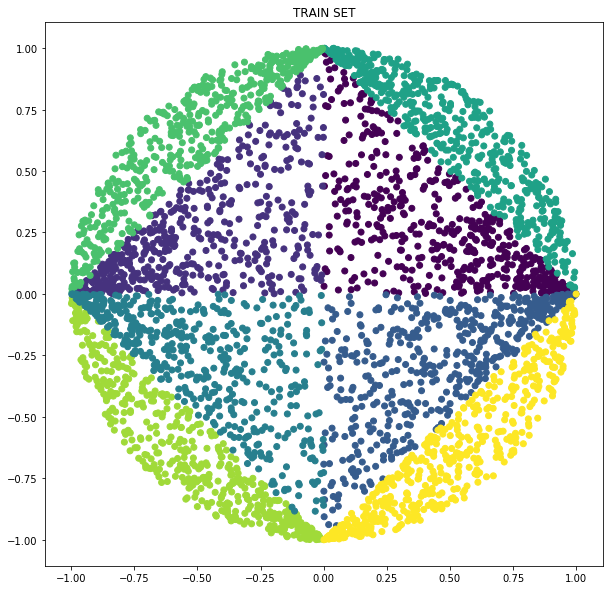

In [6]:
plt.figure(figsize=(10,10))
plt.title('TRAIN SET')
plt.scatter(X_train[:,0], X_train[:,1], c = y_train)
plt.show()

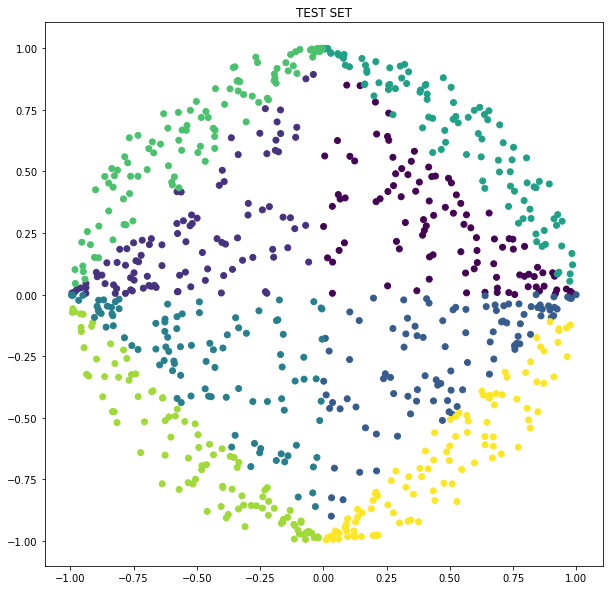

In [7]:
plt.figure(figsize=(10,10))
plt.title('TEST SET')
plt.scatter(x_test[:,0], x_test[:,1], c = y_test)
plt.show()

In [8]:
onehot = OneHotEncoder()

In [9]:
onehot = OneHotEncoder()
y_train = onehot.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = onehot.fit_transform(y_test.reshape(-1,1)).toarray()

***

In [10]:
neural_net = DNN()

In [11]:
neural_net.fit(X_train.T, y_train.T, x_test.T, y_test.T, hidden="relu", output="softmax")

EPOCH 0 Train cost : 2.07944174 | val cost : 2.07944168
EPOCH 10 Train cost : 2.07504349 | val cost : 2.07501095
EPOCH 20 Train cost : 2.03168039 | val cost : 2.03128552
EPOCH 30 Train cost : 1.91573628 | val cost : 1.91500015
EPOCH 40 Train cost : 1.72005205 | val cost : 1.72005055
EPOCH 50 Train cost : 1.47676288 | val cost : 1.47795439
EPOCH 60 Train cost : 1.18330782 | val cost : 1.1839337
EPOCH 70 Train cost : 0.9275745 | val cost : 0.92940769
EPOCH 80 Train cost : 0.75342161 | val cost : 0.75778496
EPOCH 90 Train cost : 0.61249001 | val cost : 0.61745059
EPOCH 100 Train cost : 0.49481818 | val cost : 0.49796817
EPOCH 110 Train cost : 0.42348373 | val cost : 0.42768344
EPOCH 120 Train cost : 0.37329832 | val cost : 0.37538299
EPOCH 130 Train cost : 0.34712932 | val cost : 0.34427312
EPOCH 140 Train cost : 0.33911832 | val cost : 0.33171727
EPOCH 150 Train cost : 0.33641125 | val cost : 0.32633292
EPOCH 160 Train cost : 0.33191034 | val cost : 0.32221522
EPOCH 170 Train cost : 0.32

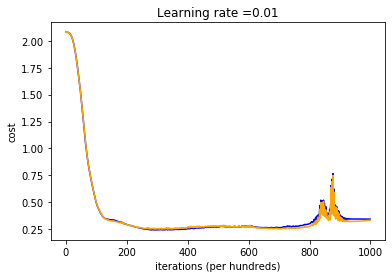

In [12]:
neural_net.train([2, 10, 10, 8], learning_rate=0.01, iterations=1000, adam_optimizer=True)

In [13]:
y_pred = neural_net.predict(x_test.T).T

In [14]:
np.argmax(y_pred, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       5, 3, 1, 1, 5, 1, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 1,
       1, 1, 1, 1, 5, 5, 1, 1, 1, 5, 1, 1, 1, 5, 5, 1, 1, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1,
       1, 1, 5, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5,

In [15]:
np.argmax(y_test, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5,

In [16]:
accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

0.85625

In [18]:
cf_matrix = confusion_matrix(np.argmax(y_test, axis =1), np.argmax(y_pred,axis =1))

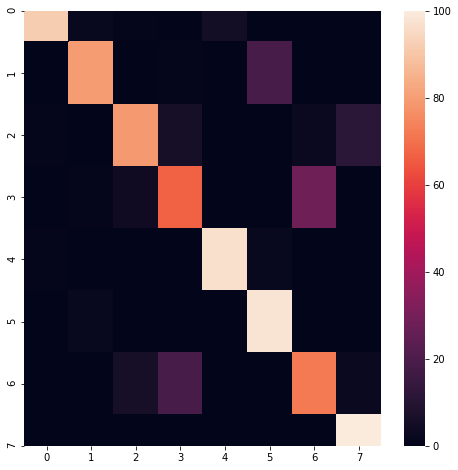

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(cf_matrix)